# MOO experiment design

We show you how to optimise your experiment to maximise both the accuracy and reliability of the experiment. Unfortunately these programs will take significantly longer to run than the SOO programs as more must be simulated.

In [1]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


## MOO for 2D field

description...

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      1 |             - |             -


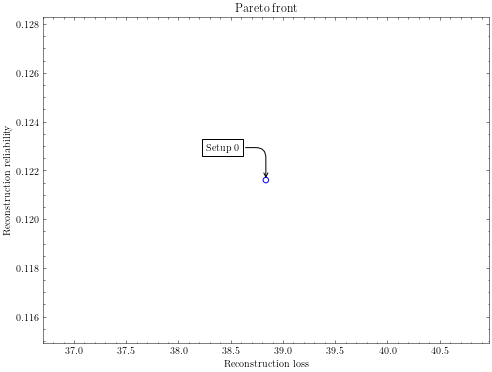

Loss shown: 8736.566565409204


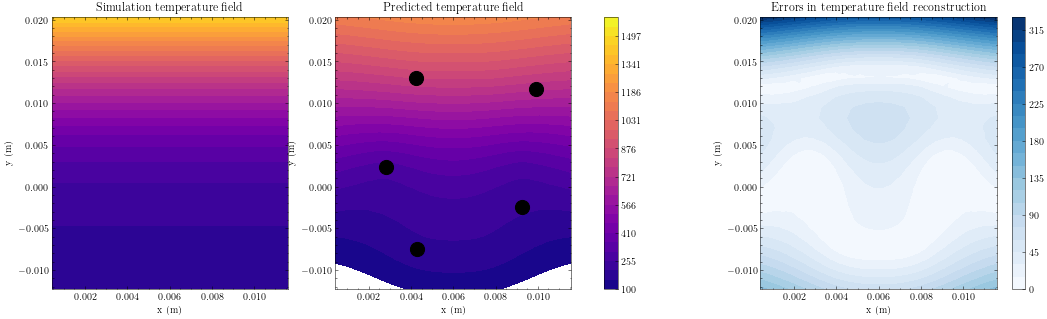

In [2]:
from run_me import *

# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'field_temp.obj')
grid = pickle_manager.read_file('simulation', 'grid_temp.obj')

bounds = true_temp_field.get_bounds()
sensor_bounds = bounds+np.array([[1, 1], [-1, -1]])*0.002

# Setup the symmetry
symmetry_manager = SymmetryManager()
symmetry_manager.set_2D_x(np.mean(bounds[:, 0]))

# Setup the sensor suite
temps = pickle_manager.read_file('sensors', 'k-type-T.obj')
voltages = pickle_manager.read_file('sensors', 'k-type-V.obj')
sensor = Thermocouple(temps, voltages)
sensors = np.array([sensor]*5)
sensor_suite = SensorSuite(
    ScalarField(RBFModel, bounds, true_temp_field.get_dim()), 
    sensors,
    symmetry=[symmetry_manager.reflect_2D_horiz]
)

# Setup the experiment
optimiser = NSGA2Optimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_moo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()


# Display and save the results
for i, setup in enumerate(res.X):
    pickle_manager.save_file('results', 'Layout'+str(i)+'.obj', setup.reshape(-1, true_temp_field.get_dim()))

graph_manager.draw(graph_manager.build_pareto(
    res.F
))

display_str = input('Enter setup to display [Q to quit]: ')
while display_str.isnumeric():
    experiment.set_all_sensors_active()
    proposed_layout, true_temps, model_temps, sensor_values = experiment.get_plotting_arrays(res.X[i])
    graph_manager.draw(graph_manager.build_2D_compare(
        grid,
        proposed_layout,
        true_temps,
        model_temps
    ))
    display_str = input('Enter setup to display [Q to quit]: ')


## MOO for 1D field

description...

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      1 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |             f


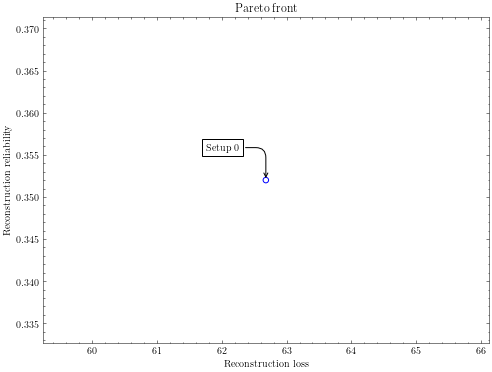

Loss shown: 390.2870965589729


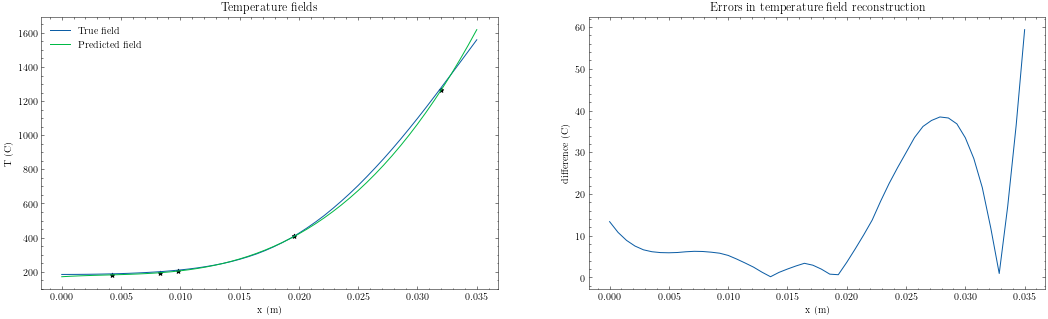

In [3]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'field_temp_line.obj')
grid = pickle_manager.read_file('simulation', 'line_temp.obj')

bounds = true_temp_field.get_bounds()
sensor_bounds = bounds + np.array([[1], [-1]])*0.002

# Setup the sensor suite
temps = pickle_manager.read_file('sensors', 'k-type-T.obj')
voltages = pickle_manager.read_file('sensors', 'k-type-V.obj')
sensor = Thermocouple(temps, voltages)
sensors = np.array([sensor]*5)
sensor_suite = SensorSuite(
    ScalarField(CSModel, bounds, true_temp_field.get_dim()), 
    sensors,
    symmetry=[]
)

# Setup the experiment
optimiser = NSGA2Optimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_moo(
    sensor_suite,
    sensor_bounds,
    depth=2,
    repetitions=10,
    loss_limit=100
)
res = experiment.design()


# Display and save the results
for i, setup in enumerate(res.X):
    pickle_manager.save_file('results', 'Layout'+str(i)+'.obj', setup.reshape(-1, true_temp_field.get_dim()))

graph_manager.draw(graph_manager.build_pareto(
    res.F
))

display_str = input('Enter setup to display [Q to quit]: ')
while display_str.isnumeric():
    experiment.set_all_sensors_active()
    proposed_layout, true_temps, model_temps, sensor_values = experiment.get_plotting_arrays(res.X[i])
    graph_manager.draw(graph_manager.build_1D_compare(
        grid,
        proposed_layout,
        sensor_values,
        true_temps,
        model_temps
    ))
    display_str = input('Enter setup to display [Q to quit]: ')